<a href="https://colab.research.google.com/github/yeneua/HG-MLDL/blob/main/7_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled=train_input/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
# 모델을 만드는 함수정의
# -> model_fn에 객체를 줄 경우, 그 객체가 층으로 추가됨
def model_fn(a_layer=None):
  model=keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu')) 
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [3]:
# a_layer 매개변수로 층을 추가하지 않은 모델
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 모델 설정, 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


In [6]:
# history 객체에 담겨있는 훈련 측정값
print(history.history['loss'])
print(history.history['accuracy'])

[0.5318652987480164, 0.3929615616798401, 0.35362347960472107, 0.33536577224731445, 0.3199089765548706]
[0.8127708435058594, 0.8577499985694885, 0.8738541603088379, 0.8813333511352539, 0.8857083320617676]


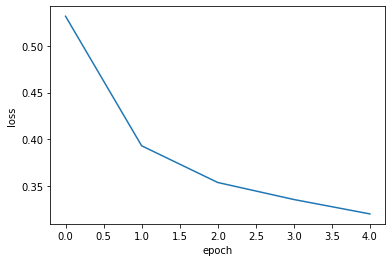

In [7]:
# 손실값 그래프로 그리기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

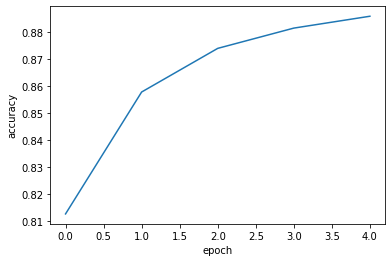

In [8]:
# 정확도 그래프로 그리기
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

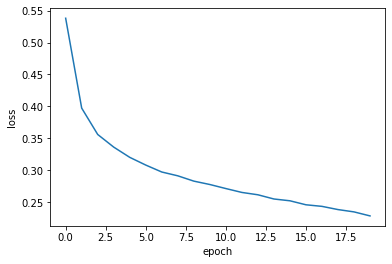

In [9]:
# 에포크 20번으로 늘려서 그려보기
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [10]:
# 검증손실

In [11]:
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target)) # 검증 손실 계산 -> validation_data 전달

In [12]:
print(history.history.keys())
# history 객체에 val_loss, val_accuracy가 들어있음

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


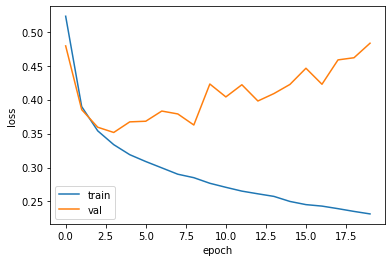

In [13]:
# 훈련세트 손실, 검증세트 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

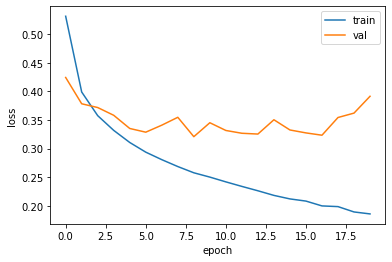

In [14]:
# adam 옵티마이저 사용
model=model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
# 드롭아웃
# 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막음
# 특정 뉴런에 과대하게 의존하는 것을 막음
# 모든 입력에 대해 주의를 기울여야 함

In [17]:
# Dropout층을 추가함 - model_fn() 함수에 드롭아웃 객체 전달
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 드롭아웃 층을 추가한 모델을 설정하고 훈련
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

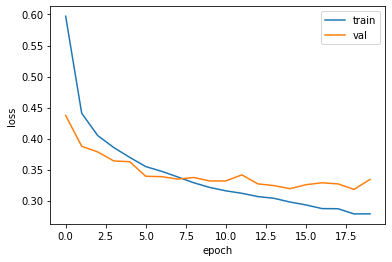

In [20]:
# 훈련손실, 검증손실 그래프로 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [21]:
# 과대적합이 확실히 줄었다 !!
# but, 20번 에포크 동안 훈련했기 때문에 다소 과대적합
# 에포크를 10으로 하고 다시 훈련

In [22]:
# 모델 저장과 복원

In [23]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history=model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

In [24]:
# save_weights() : 모델의 가중치를 저장하는 메서드
model.save_weights('model-weights.h5')

In [25]:
# save() : 모델 구조와 모델 파라미터를 함께 저장하는 메서드
model.save('model-whole.h5')

In [28]:
# 파일이 잘 저장되었는지 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Oct 11 12:24 model-weights.h5
-rw-r--r-- 1 root root 982664 Oct 11 12:25 model-whole.h5


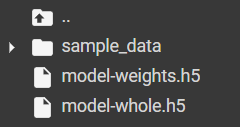

In [29]:
# 첫번째 실험
# 훈련 하지 않은 새로운 모델을 만들고, model-weights.h5 파일에서 훈련된 모델 파라미터 읽어오기
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [32]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1) # predict(): 샘플 하나마다 10개의 클래스에 대한 확률 반환 -> 10개의 확률 중 가장 큰 값의 인덱스 골라냄
print(np.mean(val_labels==val_target)) # 정확도. True & False

0.8825


In [33]:
# 두번째 실험
# model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3215 - accuracy: 0.8825


[0.32147079706192017, 0.8824999928474426]

In [35]:
# => 첫번째 실험, 두번째 실험 정확도가 0.8825로 동일 ! 

In [36]:
# *
# 충분히 큰 에포크로 훈련 -> 검증세트&훈련세트 손실 비교 -> 과대적합되는 지점까지 다시 훈련
# -> 처음 모델을 훈련할 때 자동으로 검증세트 손실이 증가하는 지점에서 훈련을 멈추고 가중치를 저장할 수는 없을까?

In [37]:
# 콜백
# 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

In [38]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [39]:
# 콜백 객체 생성
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True) # save_best_only=True : 가장 낮은 검증 점수를 만드는 모델을 저장

In [40]:
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb]) # 콜백 객체 전달

In [44]:
# 최상의 검증 점수를 낸 모델이 저장된 best-model.h5 불러오기
model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3171 - accuracy: 0.8846


[0.3171251714229584, 0.8845833539962769]

In [45]:
# 조기종료
# 검증 점수가 상승하기 시작할때 훈련 종료하기

In [46]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [47]:
# 콜백객체
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

In [49]:
# 조기종료 객체
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# patience=2 : 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
# restore_best_weights=True : 가장 낮은 검증 손실을 낸 모델 파라미터로 돌림

In [51]:
history=model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target),callbacks=([checkpoint_cb,early_stopping_cb]))

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5936 - accuracy: 0.7897 - val_loss: 0.4645 - val_accuracy: 0.8255
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8436 - val_loss: 0.3987 - val_accuracy: 0.8519
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4039 - accuracy: 0.8541 - val_loss: 0.3718 - val_accuracy: 0.8617
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3813 - accuracy: 0.8603 - val_loss: 0.3510 - val_accuracy: 0.8737
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3691 - accuracy: 0.8649 - val_loss: 0.3511 - val_accuracy: 0.8726
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3548 - accuracy: 0.8705 - val_loss: 0.3451 - val_accuracy: 0.8706
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3473 - accuracy: 0.8718 - val_loss: 0.3482 - val_accuracy:

In [52]:
# stopped_epoch : 몇번째 에포크에서 훈련이 중지되었는지 확인 가능
print(early_stopping_cb.stopped_epoch)

10


In [54]:
# => 에포크 횟수가 0부터 시작
# 10은 열한번째 에포크에서 훈련이 중지되었다는 말 0~10
# patience=2 이기 때문에 최상의 모델은 아홉번째 모델 (epochs=8)

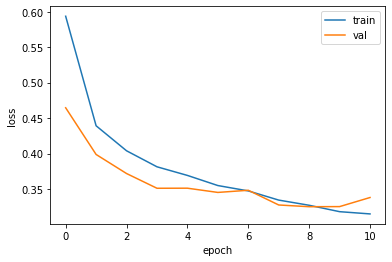

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [57]:
# 조기종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3250 - accuracy: 0.8828


[0.3249863386154175, 0.8828333616256714]